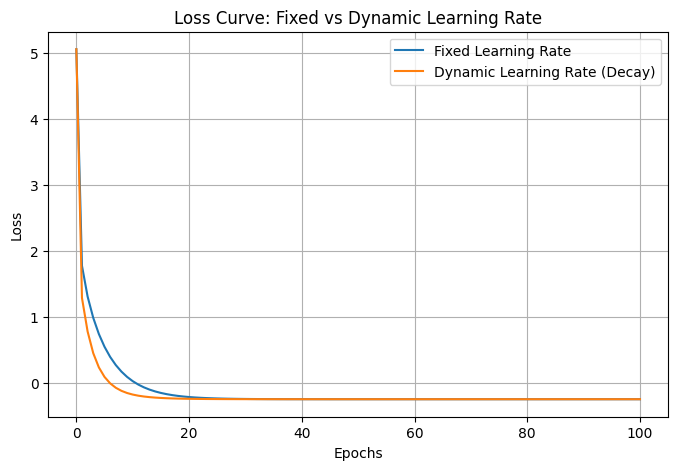

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define function and gradient
def f(x, y):
    return x**4 - x**2 + y**2

def grad_f(x, y):
    return 4 * x**3 - 2 * x, 2 * y

# Gradient Descent with fixed learning rate
def gd_fixed_lr(x0, y0, lr, epochs):
    x, y = x0, y0
    path = [(x, y, f(x, y))]
    losses = [f(x, y)]
    for _ in range(epochs):
        dx, dy = grad_f(x, y)
        x -= lr * dx
        y -= lr * dy
        path.append((x, y, f(x, y)))
        losses.append(f(x, y))
    return path, losses

# Gradient Descent with dynamic learning rate (decay)
def gd_dynamic_lr(x0, y0, lr_init, decay_rate, epochs):
    x, y = x0, y0
    path = [(x, y, f(x, y))]
    losses = [f(x, y)]
    for epoch in range(1, epochs + 1):
        lr = lr_init / (1 + decay_rate * epoch)
        dx, dy = grad_f(x, y)
        x -= lr * dx
        y -= lr * dy
        path.append((x, y, f(x, y)))
        losses.append(f(x, y))
    return path, losses

# Plot loss curves
def plot_loss_curves(loss_fixed, loss_dynamic):
    plt.figure(figsize=(8,5))
    plt.plot(loss_fixed, label='Fixed Learning Rate')
    plt.plot(loss_dynamic, label='Dynamic Learning Rate (Decay)')
    plt.title('Loss Curve: Fixed vs Dynamic Learning Rate')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
x0, y0 = -1.5, 1.5
epochs = 100
fixed_lr = 0.05
dynamic_lr_init = 0.1
decay_rate = 0.05

# Run GD with fixed and dynamic LR
path_fixed, loss_fixed = gd_fixed_lr(x0, y0, fixed_lr, epochs)
path_dynamic, loss_dynamic = gd_dynamic_lr(x0, y0, dynamic_lr_init, decay_rate, epochs)

# Plot the loss curves comparison
plot_loss_curves(loss_fixed, loss_dynamic)


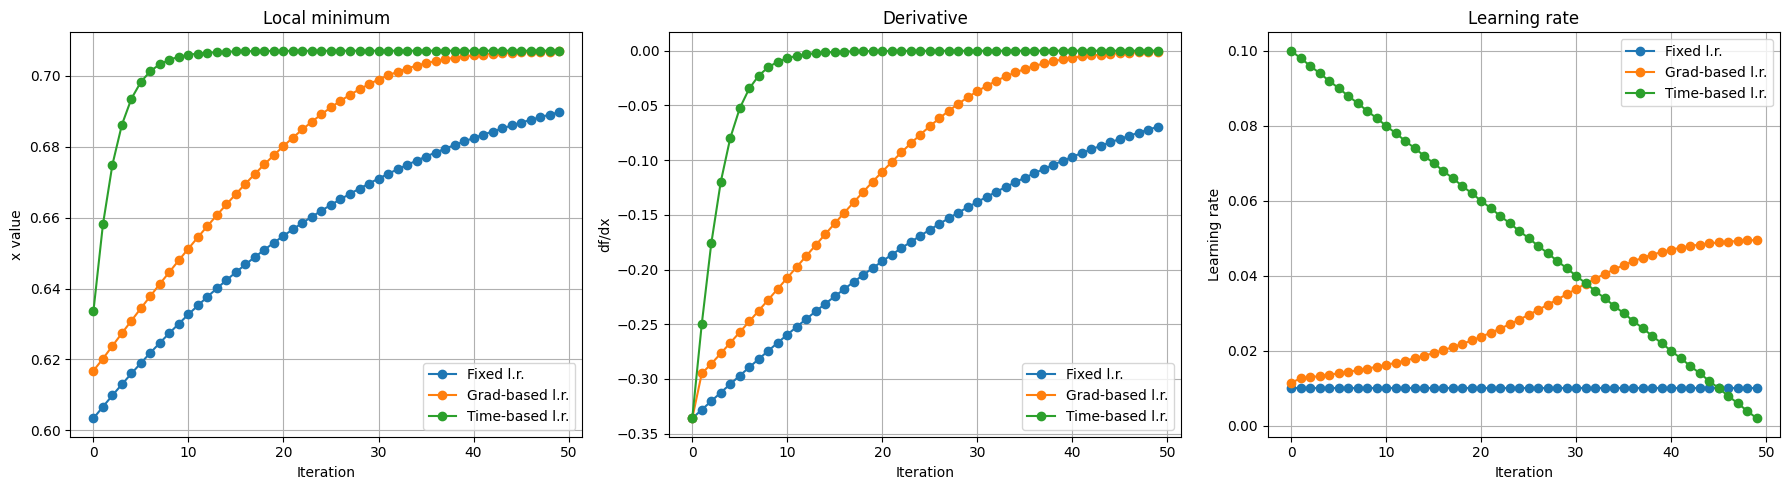

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function and derivative for x (1D simplification)
def f(x):
    return x**4 - x**2

def df(x):
    return 4 * x**3 - 2 * x

# Gradient Descent with different learning rates
def gd_fixed_lr(x0, lr, epochs):
    x = x0
    xs = []
    dfs = []
    lrs = []
    for _ in range(epochs):
        grad = df(x)
        x = x - lr * grad
        xs.append(x)
        dfs.append(grad)
        lrs.append(lr)
    return xs, dfs, lrs

def gd_grad_based_lr(x0, lr_init, epochs):
    x = x0
    xs = []
    dfs = []
    lrs = []
    lr = lr_init
    for i in range(epochs):
        grad = df(x)
        x = x - lr * grad
        xs.append(x)
        dfs.append(grad)
        # Gradient based lr: decrease proportional to gradient magnitude
        lr = lr_init / (1 + abs(grad)*10)
        lrs.append(lr)
    return xs, dfs, lrs

def gd_time_based_lr(x0, lr_init, epochs):
    x = x0
    xs = []
    dfs = []
    lrs = []
    for i in range(epochs):
        lr = lr_init * (1 - i / epochs)  # linearly decay learning rate
        grad = df(x)
        x = x - lr * grad
        xs.append(x)
        dfs.append(grad)
        lrs.append(lr)
    return xs, dfs, lrs

# Parameters
x0 = 0.6
epochs = 50

# Run experiments
x_fixed, df_fixed, lr_fixed = gd_fixed_lr(x0, lr=0.01, epochs=epochs)
x_grad, df_grad, lr_grad = gd_grad_based_lr(x0, lr_init=0.05, epochs=epochs)
x_time, df_time, lr_time = gd_time_based_lr(x0, lr_init=0.1, epochs=epochs)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Local minimum (x) over iterations
axes[0].plot(range(epochs), x_fixed, 'o-', label='Fixed l.r.')
axes[0].plot(range(epochs), x_grad, 'o-', label='Grad-based l.r.')
axes[0].plot(range(epochs), x_time, 'o-', label='Time-based l.r.')
axes[0].set_title('Local minimum')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('x value')
axes[0].legend()
axes[0].grid(True)

# Derivative over iterations
axes[1].plot(range(epochs), df_fixed, 'o-', label='Fixed l.r.')
axes[1].plot(range(epochs), df_grad, 'o-', label='Grad-based l.r.')
axes[1].plot(range(epochs), df_time, 'o-', label='Time-based l.r.')
axes[1].set_title('Derivative')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('df/dx')
axes[1].legend()
axes[1].grid(True)

# Learning rate over iterations
axes[2].plot(range(epochs), lr_fixed, 'o-', label='Fixed l.r.')
axes[2].plot(range(epochs), lr_grad, 'o-', label='Grad-based l.r.')
axes[2].plot(range(epochs), lr_time, 'o-', label='Time-based l.r.')
axes[2].set_title('Learning rate')
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Learning rate')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()
